In [14]:
import glob
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nibabel as nib
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix, plot_stat_map
import os
import pandas as pd
import pickle
import re

import sys
sys.path.append('/Users/zeynepenkavi/Documents/RangelLab/DescribedVsLearned_fmri/analysis/01_level1')
from level1_utils import run_level1, make_level1_design_matrix, get_events

ModuleNotFoundError: No module named 'seaborn'

In [2]:
data_path = '/Users/zeynepenkavi/Downloads/GTavares_2017_arbitration/bids_nifti_wface/'
behavior_path = '/Users/zeynepenkavi/Downloads/GTavares_2017_arbitration/behavioral_data/all_trials.csv'
out_path = os.path.join(data_path, "derivatives/nilearn/glm/level1/")

subnum = '01'
runnum='4'

A 'modulation' column was found in the given events data and is used.


/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/_utils/glm.py:310: UserWarning: Matrix is singular at working precision, regularizing...
  warn('Matrix is singular at working precision, regularizing...')


<AxesSubplot:label='conditions', ylabel='scan number'>

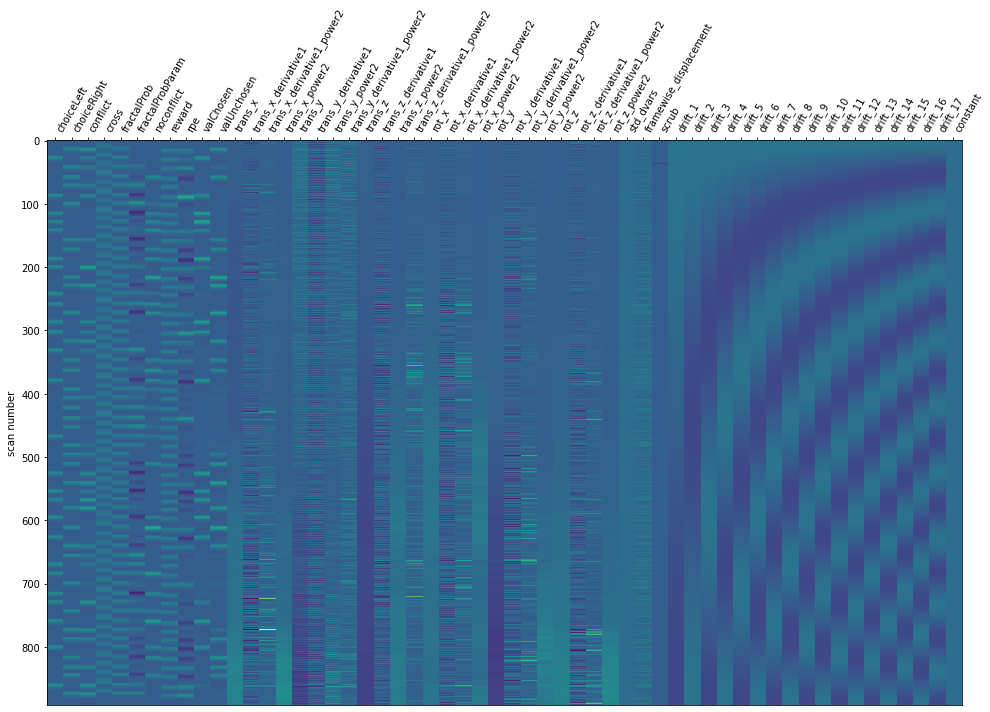

In [3]:
design_matrix_rt0= make_level1_design_matrix(subnum, runnum, data_path, behavior_path, regress_rt = 0)
plot_design_matrix(design_matrix_rt0)

In [4]:
beh_regs = design_matrix_rt0.columns
beh_regs = [i for i in beh_regs if '_' not in i]
beh_regs = [i for i in beh_regs if 'scrub' not in i]
beh_regs = [i for i in beh_regs if 'constant' not in i]
design_matrix_rt0[beh_regs].corr()

,choiceLeft,choiceRight,conflict,cross,fractalProb,fractalProbParam,noconflict,reward,rpe,valChosen,valUnchosen
choiceLeft,1.000000,-0.350082,0.253520,-0.417826,0.453877,-0.105682,0.329573,0.200311,-0.053633,0.791300,-0.275473
choiceRight,-0.350082,1.000000,0.327487,-0.488671,0.551531,0.100783,0.235018,0.271602,0.049499,-0.285726,0.740472
conflict,0.253520,0.327487,1.000000,-0.477853,0.392011,0.020758,-0.288931,0.300506,0.278657,0.221958,0.289613
cross,-0.417826,-0.488671,-0.477853,1.000000,-0.549370,0.004726,-0.464389,-0.711303,-0.022624,-0.368879,-0.424842
fractalProb,0.453877,0.551531,0.392011,-0.549370,1.000000,0.006043,0.377543,0.027088,0.000569,0.306728,0.341923
fractalProbParam,-0.105682,0.100783,0.020758,0.004726,0.006043,1.000000,-0.142026,0.032470,0.027677,-0.313751,-0.251044
noconflict,0.329573,0.235018,-0.288931,-0.464389,0.377543,-0.142026,1.000000,0.294054,-0.252008,0.297288,0.393344
reward,0.200311,0.271602,0.300506,-0.711303,0.027088,0.032470,0.294054,1.000000,0.006339,0.237644,0.262815
rpe,-0.053633,0.049499,0.278657,-0.022624,0.000569,0.027677,-0.252008,0.006339,1.000000,-0.087427,0.033939
valChosen,0.791300,-0.285726,0.221958,-0.368879,0.306728,-0.313751,0.297288,0.237644,-0.087427,1.000000,-0.231776


A 'modulation' column was found in the given events data and is used.


/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/_utils/glm.py:310: UserWarning: Matrix is singular at working precision, regularizing...
  warn('Matrix is singular at working precision, regularizing...')


<AxesSubplot:label='conditions', ylabel='scan number'>

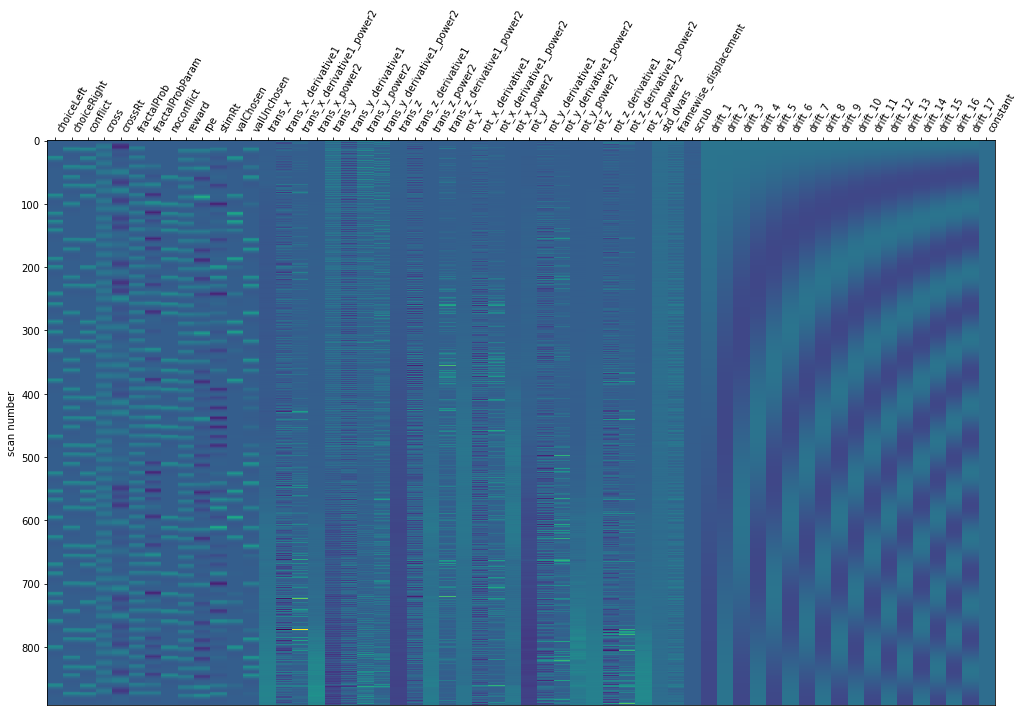

In [5]:
design_matrix_rt1= make_level1_design_matrix(subnum, runnum, data_path, behavior_path, regress_rt = 1)
plot_design_matrix(design_matrix_rt1)

In [6]:
beh_regs = design_matrix_rt1.columns
beh_regs = [i for i in beh_regs if '_' not in i]
beh_regs = [i for i in beh_regs if 'scrub' not in i]
beh_regs = [i for i in beh_regs if 'constant' not in i]
design_matrix_rt1[beh_regs].corr()

,choiceLeft,choiceRight,conflict,cross,crossRt,fractalProb,fractalProbParam,noconflict,reward,rpe,stimRt,valChosen,valUnchosen
choiceLeft,1.000000,-0.350082,0.227704,-0.397752,-0.107276,0.453877,-0.105682,0.343857,0.200311,-0.053633,0.110568,0.785239,-0.292274
choiceRight,-0.350082,1.000000,0.411169,-0.427215,-0.126528,0.551531,0.100783,0.282803,0.271602,0.049499,-0.101334,-0.281411,0.808091
conflict,0.227704,0.411169,1.000000,-0.392530,-0.156105,0.443491,0.071532,-0.346810,0.337897,0.302601,0.048601,0.162273,0.289650
cross,-0.397752,-0.427215,-0.392530,1.000000,0.000112,-0.507547,0.044355,-0.500566,-0.634884,-0.035746,-0.032182,-0.323851,-0.418113
crossRt,-0.107276,-0.126528,-0.156105,0.000112,1.000000,-0.248806,-0.039051,-0.051160,-0.101781,-0.006649,-0.088604,-0.086486,-0.079291
fractalProb,0.453877,0.551531,0.443491,-0.507547,-0.248806,1.000000,0.006043,0.426543,0.027088,0.000569,0.001233,0.310303,0.387498
fractalProbParam,-0.105682,0.100783,0.071532,0.044355,-0.039051,0.006043,1.000000,-0.069736,0.032470,0.027677,-0.204501,-0.339778,-0.263150
noconflict,0.343857,0.282803,-0.346810,-0.500566,-0.051160,0.426543,-0.069736,1.000000,0.337522,-0.305549,-0.048910,0.304034,0.295793
reward,0.200311,0.271602,0.337897,-0.634884,-0.101781,0.027088,0.032470,0.337522,1.000000,0.006339,-0.096463,0.234803,0.289583
rpe,-0.053633,0.049499,0.302601,-0.035746,-0.006649,0.000569,0.027677,-0.305549,0.006339,1.000000,0.052850,-0.085767,0.018270


Difference between the design matrices with and without rt regressors for the regressors that it matters for

<AxesSubplot:label='conditions', ylabel='scan number'>

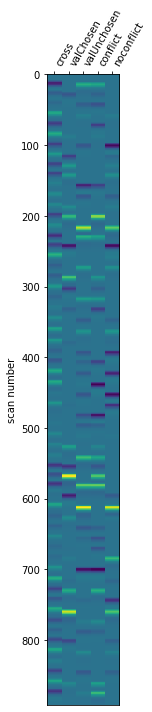

In [19]:
rt_regs = ['cross', 'valChosen', 'valUnchosen', 'conflict', 'noconflict']
plot_design_matrix(design_matrix_rt0[rt_regs] - design_matrix_rt1[rt_regs])

In [22]:
int("1")

1

In [ ]:
# run_level1(subnum, data_path, behavior_path, out_path, regress_rt = 1)

In [ ]:
# run_level1(subnum, data_path, behavior_path, out_path, regress_rt = 0)

In [ ]:
# contrast_id = 'valDiff'
# zmap = nib.load(os.path.join(out_path, 'sub-%s/contrasts/sub-%s_run-%s_%s.nii.gz'%(subnum, subnum, runnum, contrast_id)))
# plot_stat_map(zmap, threshold=3.0, title='sub-%s_run-%s_%s' % (subnum, runnum, contrast_id))